# Comparison SOCAT vs Floats

In [19]:
%run _define_model_class.ipynb
%run _define_plotting_class.ipynb

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# plotting
import cmocean as cm
import matplotlib.pyplot as plt
from plotting_tools.spatial_map import SpatialMap
from plotting_tools.time_series_diagram import TimeSeriesPlot
import cartopy.crs as ccrs
from matplotlib.ticker import AutoMinorLocator
import cartopy.feature as cfeature

# Warning: Using an implicitly registered datetime converter for a matplotlib plotting method
# The converter was registered by pandas on import. 
# Future versions of pandas will require you to explicitly register matplotlib converters
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
# ===============================
# Dictionary of float members
# ===============================

# 100 testbed members - 25 from each LE
testbed_members = {'CanESM2': ['r1r10', 'r1r6', 'r1r7', 'r1r9', 'r2r1', 
                            'r2r2', 'r2r8', 'r3r1', 'r3r2', 'r3r4',
                            'r3r6', 'r3r7', 'r3r9', 'r4r1', 'r4r3', 
                            'r4r5', 'r4r6', 'r4r7', 'r4r8', 'r5r1', 
                            'r5r10', 'r5r2', 'r5r4', 'r5r5', 'r5r9'],
    'CESM':[f'{i:03d}' for i in [1,2,9,10,11,12,13,14,15,16,17,18,20,21,23,24,25,30,31,34,35,101,102,103,104]],
    'GFDL': [f'{i:02d}' for i in [1,2,3,4,5,6,8,9,10,11,12,13,14,16,17,18,19,20,22,23,26,27,28,29,30]],
    'MPI': [f'{i:03d}' for i in [6,9,14,20,22,24,25,27,38,43,45,46,57,60,64,70,75,77,78,80,81,83,91,95,98]]}

# members that were SOCAT+float sampeled
float_members = {
                'CESM':['001','010','011','014','017','035','103'],
             # 'CanESM2':['r1r4','r1r8','r2r3', 'r3r8','r4r10','r4r3','r5r5'],
              'GFDL':['15', '24', '02','03','08','19','27'], 
               'MPI':['018','021', '028', '039', '041', '027', '064'],
                } 


# members that we SOCAT+float sampled that overlap with testbed members
float_members_overlap = {
               'CESM':['001','010','011','014','017','035','103'],
    #          'CanESM2':['r4r3','r5r5'], # 'r1r4','r1r8','r2r3','r3r8','    last one to move --> r4r10',
              'GFDL':['02','03','08','19','27'], 
              'MPI':['027', '064']
              }  



In [ ]:
# members that we SOCAT+float sampled that overlap with testbed members
float_members_overlap = {
               'CESM':['001','010','011','014','017','035','103'],
    #          'CanESM2':['r4r3','r5r5'], # 'r1r4','r1r8','r2r3','r3r8','    last one to move --> r4r10',
              'GFDL':['02','03','08','19','27'], 
              'MPI':['027', '064']
              }  

# members that were SOCAT+float sampeled
float_members = {              
    'CanESM2':['r1r4','r1r8','r2r3', 'r3r8','r4r10','r4r3','r5r5'],
    'GFDL':['15', '24'], 
               'MPI':['018','021', '028', '039', '041', '027', '064'],
                } 

# Load statistics

In [21]:
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

ds = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_stats/stats_FCO2_*_SOMFFN.nc', 
                       concat_dim='member', 
                       combine='nested')

# Plot normalized STD

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


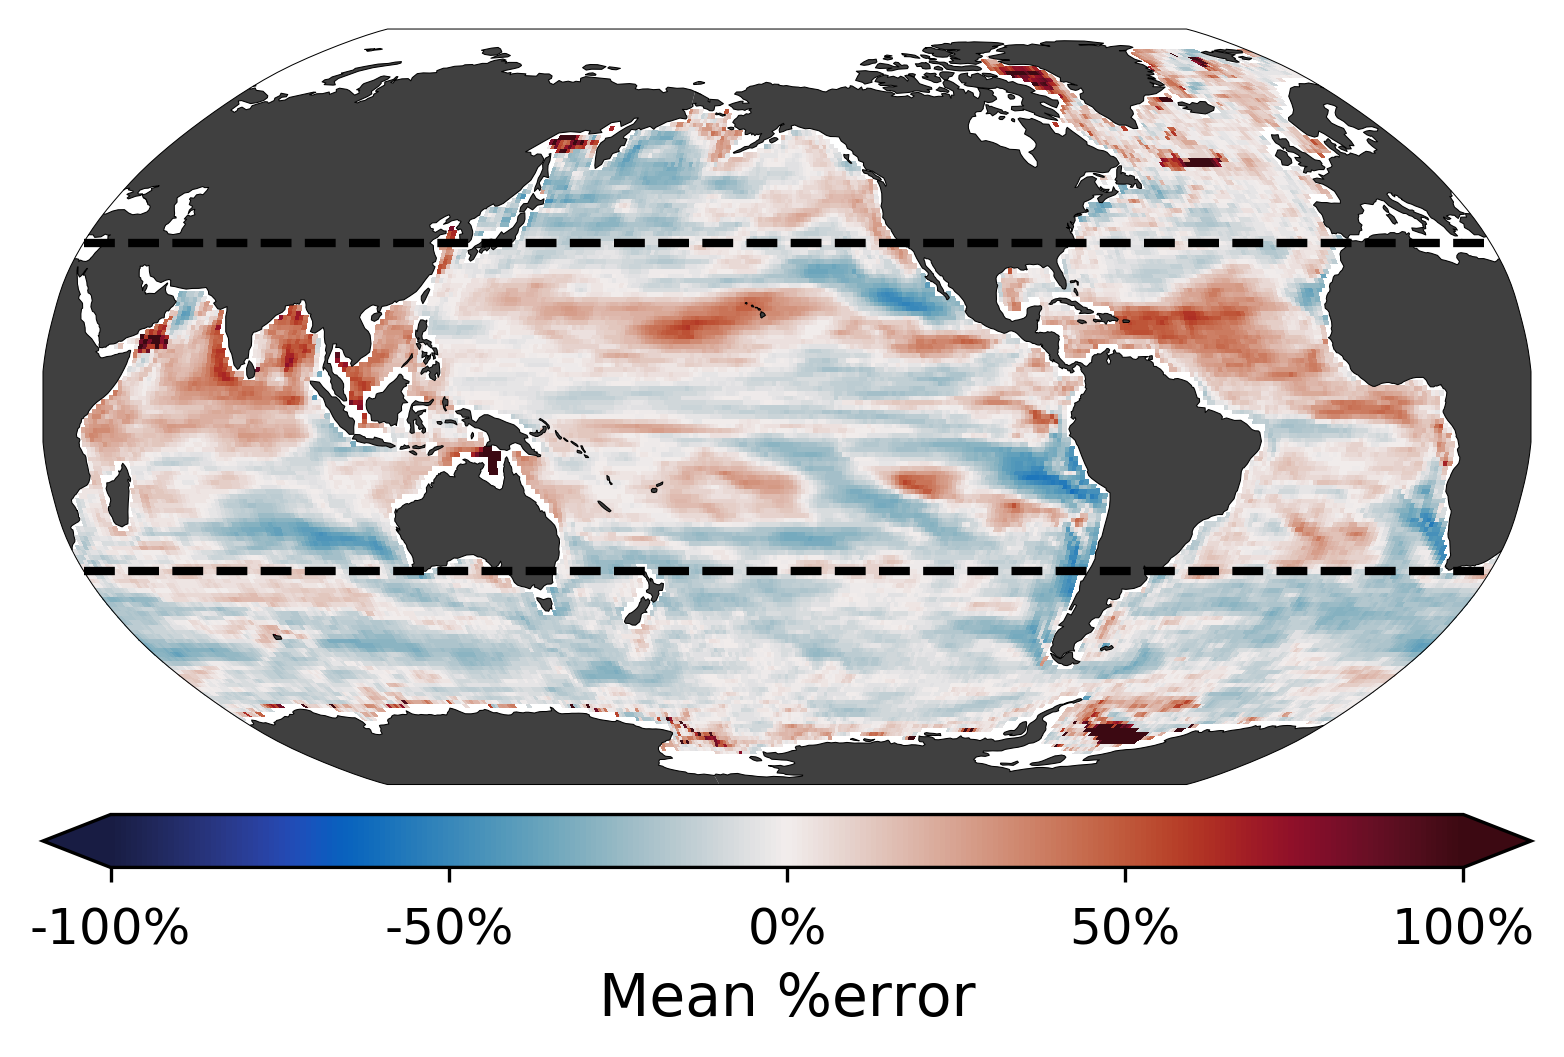

In [22]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='edge',
                   axes_pad=0.15,
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    # Colorbar ranges
    vrange_col1 = [-100, 100, 50]
    cmap_col1 = cm.cm.balance
    
    
    ##-----------------------------------------------------
    ## Ensemble mean
    ##-----------------------------------------------------
    # Correlation - Annual-variation
    data = (ds['std-star_dec']*100).mean('member')#.roll(lon=180, roll_coords='lon')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub0 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=0)    

    # add colorbar
    col = worldmap.add_colorbar(sub0, ax=0, extend='both')
    worldmap.set_cbar_xlabel(col, f'Mean %error', fontsize=14)
    worldmap.set_ticks(col, vrange_col1[0], vrange_col1[1], vrange_col1[2])
    #worldmap.set_cbar_xticklabels(col1, ['-100%', '-75%', '-50%', '-25%' ,
    #                               '0%' , '25%', '50%', '75%','100%'])
    worldmap.set_cbar_xticklabels(col, ['-100%', '-50%', '0%', '50%', '100%'])    
    
    worldmap.grid[0].plot([-180, 180], [35, 35], 'k--', linewidth=2, transform=ccrs.PlateCarree())
    worldmap.grid[0].plot([-180, 180], [-35, -35], 'k--',  linewidth=2, transform=ccrs.PlateCarree())
        
    col.ax.tick_params(labelsize=12)
#fig.savefig(f'{dir_figs}/correlation-map.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

In [28]:
(ds['std-star_dec']*100).mean('member').mean().values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(1.55597103)

# Box plot

## Decadal

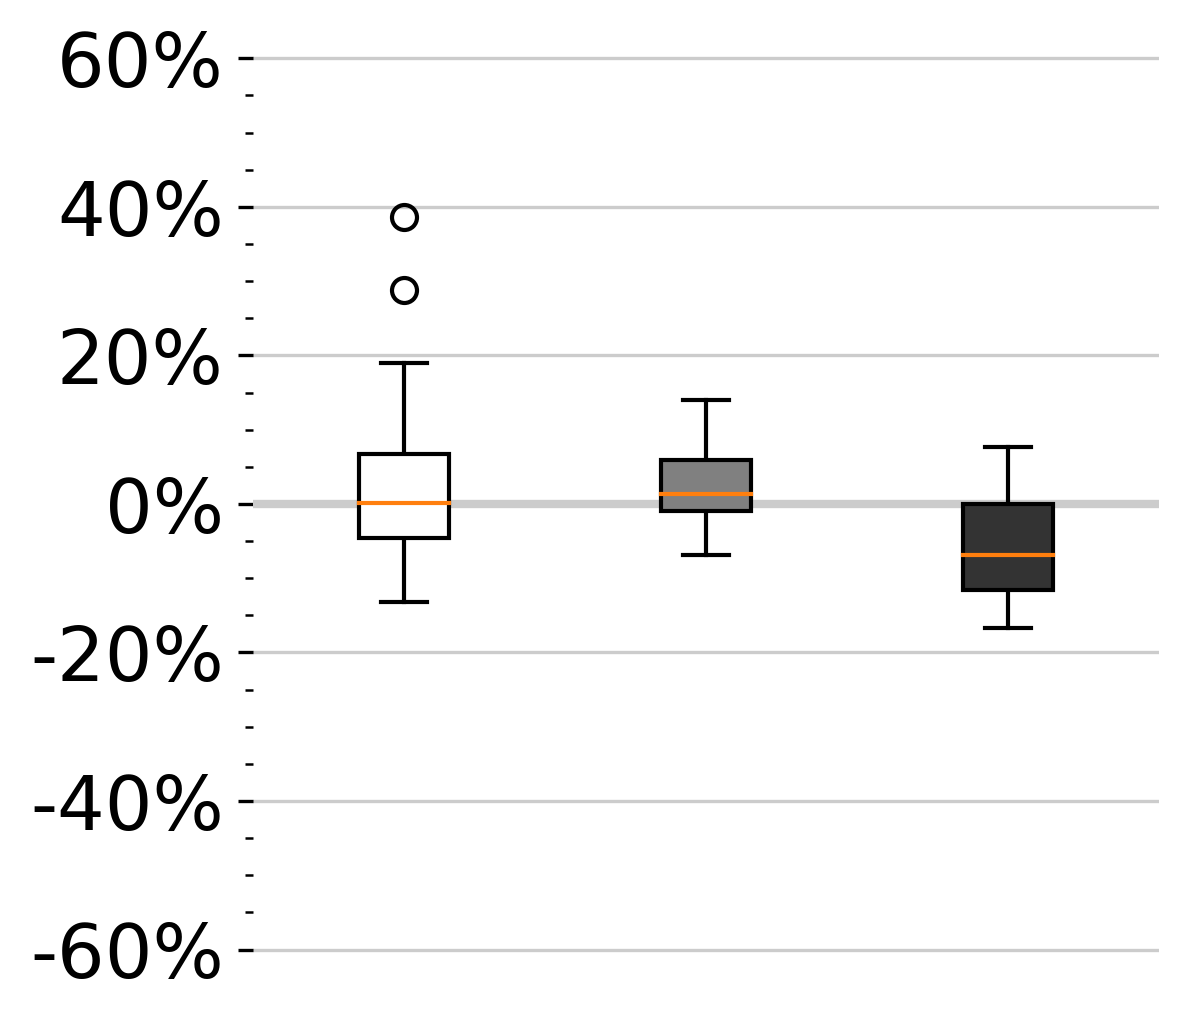

In [6]:
## Statistic to box plot
statistic = 'std-star_dec'

## Mean over lat/lon regions
data1 = (ds[statistic]*100).sel(lat=slice(35,90)).mean(['lat', 'lon'])
data2 = (ds[statistic]*100).sel(lat=slice(-35,35)).mean(['lat', 'lon'])
data3 = (ds[statistic]*100).sel(lat=slice(-90,-35)).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

ax.plot([0, 4],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)

#box = plt.boxplot(df, patch_artist=True)
 
colors = [[1,1,1], [0.5,0.5,0.5], [0.2,0.2,0.2]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#ax.set_xticklabels([r'>35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'35$\hspace{-0.2}^\circ \hspace{-0.2}$S-35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'<35$\hspace{-0.2}^\circ \hspace{-0.2}$S'], fontsize=12)

ax.set_xticklabels([r'', r'', r''])
ax.set_ylim([-61, 61])
ax.set_xlim([0.5,3.5])
ax.set_yticks(np.arange(-60, 70, 20))
ax.set_yticklabels([f'-60%', f'-40%', f'-20%', f'0%', f'20%', f'40%', f'60%'], fontsize=18)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

In [7]:
data[2].to_dataframe().describe()

,std-star_dec
count,28.000000
mean,-1.396935
std,25.762983
min,-16.687817
25%,-11.643078
50%,-6.917006
75%,0.003056
max,125.469415


## Seasonal

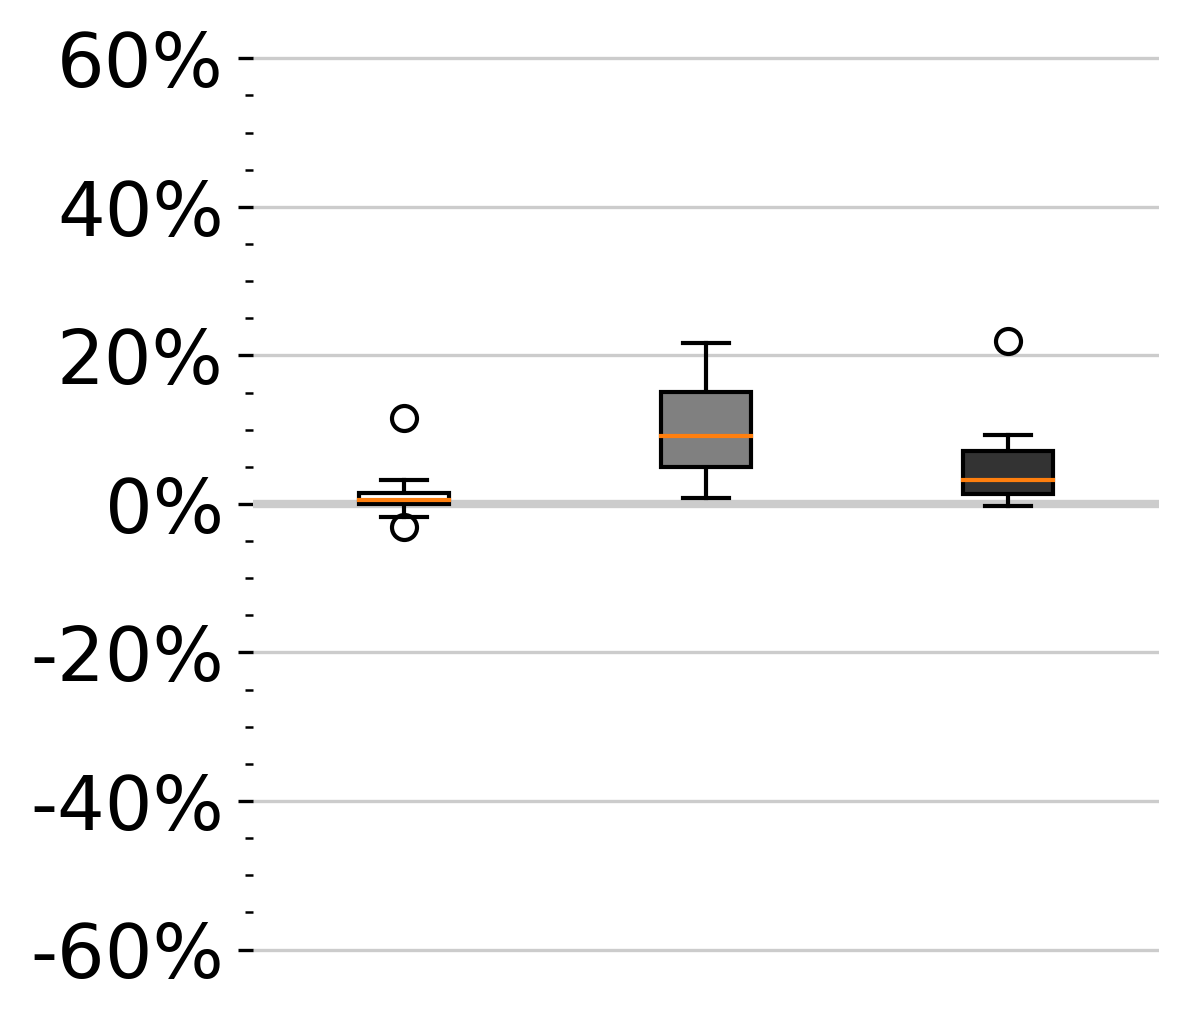

In [35]:
## Statistic to box plot
statistic = 'std-star_seasonal'

## Mean over lat/lon regions
data1 = (ds[statistic]*100).sel(lat=slice(35,90)).mean(['lat', 'lon'])
data2 = (ds[statistic]*100).sel(lat=slice(-35,35)).mean(['lat', 'lon'])
data3 = (ds[statistic]*100).sel(lat=slice(-90,-35)).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

ax.plot([0, 4],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)

#box = plt.boxplot(df, patch_artist=True)
 
colors = [[1,1,1], [0.5,0.5,0.5], [0.2,0.2,0.2]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#ax.set_xticklabels([r'>35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'35$\hspace{-0.2}^\circ \hspace{-0.2}$S-35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'<35$\hspace{-0.2}^\circ \hspace{-0.2}$S'], fontsize=12)

ax.set_xticklabels([r'', r'', r''])
ax.set_ylim([-61, 61])
ax.set_xlim([0.5,3.5])
ax.set_yticks(np.arange(-60, 70, 20))
ax.set_yticklabels([f'-60%', f'-40%', f'-20%', f'0%', f'20%', f'40%', f'60%'], fontsize=18)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

## subdecadal

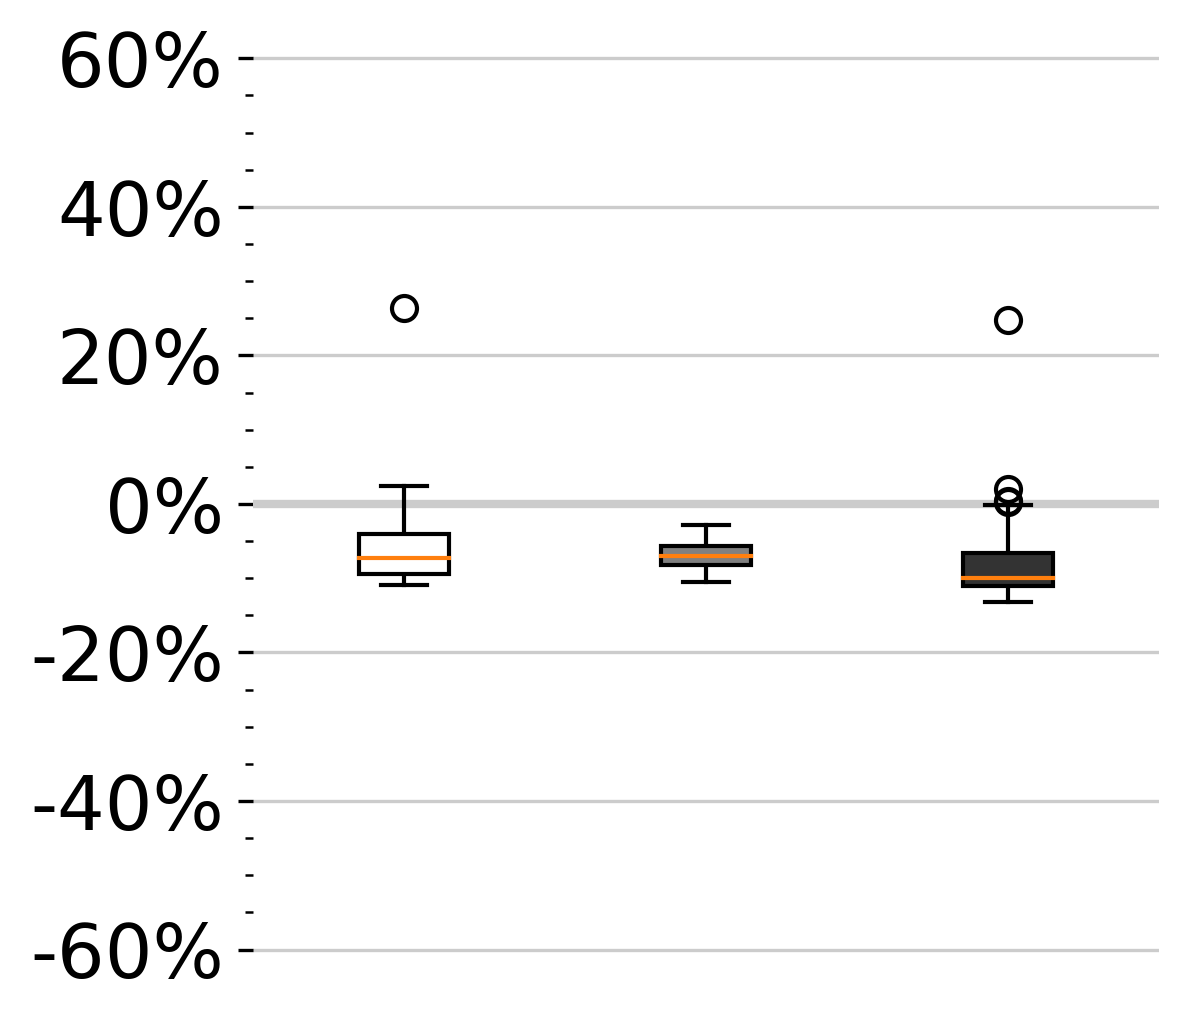

In [13]:
## Statistic to box plot
statistic = 'std-star_residual'

## Mean over lat/lon regions
data1 = (ds[statistic]*100).sel(lat=slice(35,90)).mean(['lat', 'lon'])
data2 = (ds[statistic]*100).sel(lat=slice(-35,35)).mean(['lat', 'lon'])
data3 = (ds[statistic]*100).sel(lat=slice(-90,-35)).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

ax.plot([0, 4],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)

#box = plt.boxplot(df, patch_artist=True)
 
colors = [[1,1,1], [0.5,0.5,0.5], [0.2,0.2,0.2]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#ax.set_xticklabels([r'>35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'35$\hspace{-0.2}^\circ \hspace{-0.2}$S-35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'<35$\hspace{-0.2}^\circ \hspace{-0.2}$S'], fontsize=12)

ax.set_xticklabels([r'', r'', r''])
ax.set_ylim([-61, 61])
ax.set_xlim([0.5,3.5])
ax.set_yticks(np.arange(-60, 70, 20))
ax.set_yticklabels([f'-60%', f'-40%', f'-20%', f'0%', f'20%', f'40%', f'60%'], fontsize=18)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

# Number months with data

In [10]:
ds_mask = xr.open_dataset('/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/mask_SOCAT_floats.nc')
nmonths = ds_mask['mask'].loc['1982-01':'2016-12'].sum(dim='time')
nmonths = nmonths.where(nmonths>0)

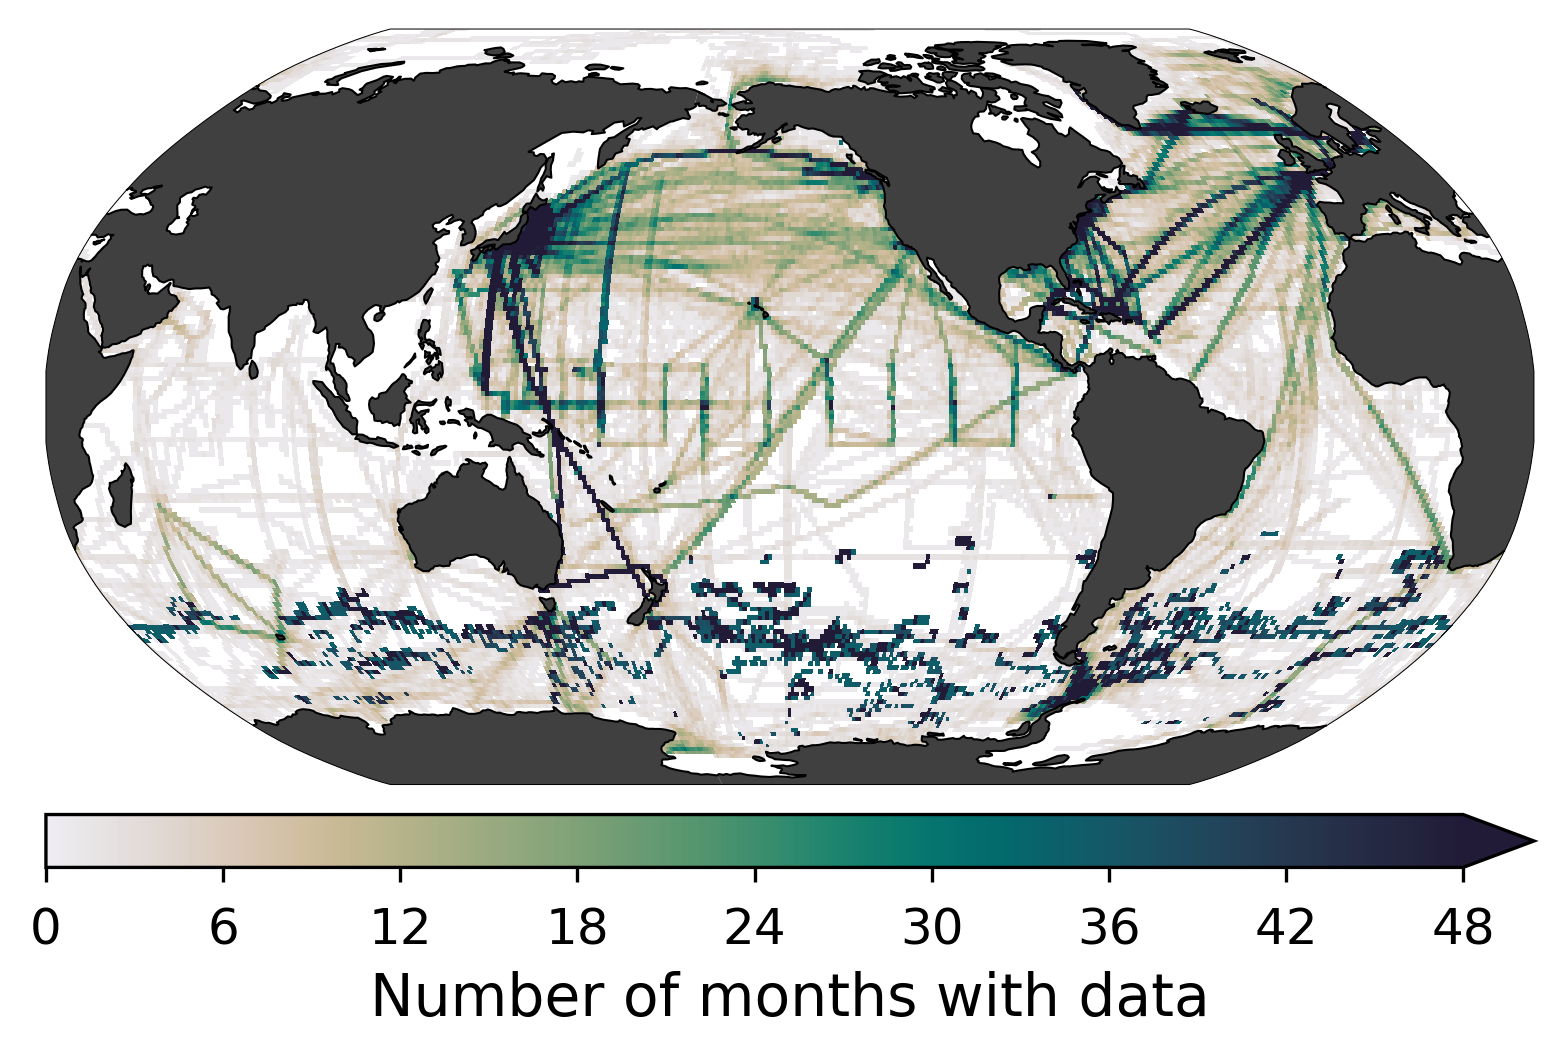

In [31]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    
    # Colorbar ranges
    vrange = [0, 48, 6]
    #cmap = cm.cm.balance
    cmap = cm.cm.rain
    data = xr_add_cyclic_point(nmonths, cyclic_coord='lon')
    
    sub = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                      vrange=vrange[0:2], cmap=cmap, ax=0, linewidth_coast=0.5)
    
    #worldmap.set_title(f'SOMFFN/{model}', ax=0)
    # add colorbar
    col = worldmap.add_colorbar(sub, ax=0,extend='max')
    worldmap.set_cbar_xlabel(col, 'Number of months with data', fontsize=14)
    worldmap.set_ticks(col, vrange[0], vrange[1], vrange[2])
    col.ax.tick_params(labelsize=12)
    
    #worldmap.grid[0].plot([-180, 180], [35, 35], 'k--', linewidth=2, transform=ccrs.PlateCarree())
    #worldmap.grid[0].plot([-180, 180], [-35, -35], 'k--',  linewidth=2, transform=ccrs.PlateCarree())
        
    #col.set_label_text(['','','','','','','',''])
    #col.ax.set_xticklabels(['0','24','','72','','120','','168'])
    #col.ax.set_xticklabels(clevs1[::1],rotation=90)
#fig.savefig(f'{dir_figs}/months-with-measurements.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

In [30]:
nmonths.mean()

<xarray.DataArray 'mask' ()>
array(12.64178121)

# Correlation

In [6]:
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_stats/stats_FCO2_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


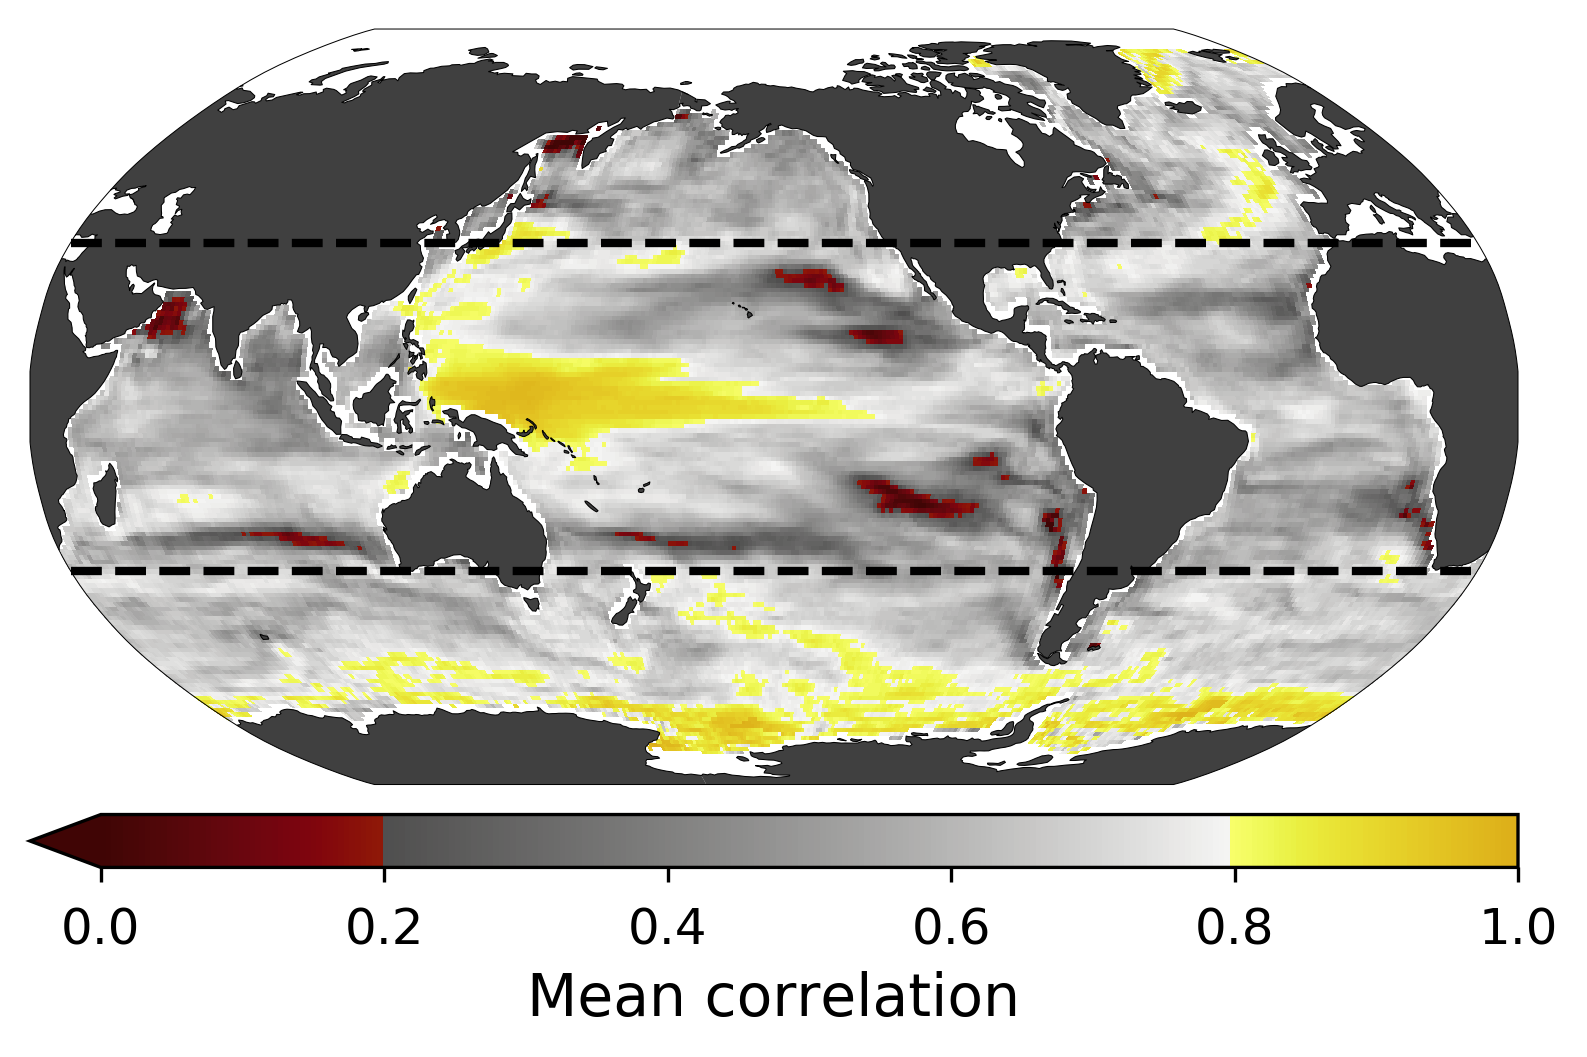

In [15]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world',
                   cbar_mode='edge',
                   axes_pad=0.15,
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    # Colorbar ranges
    vrange_col1 = [0, 1, 0.2]
    cmap_col1 = cm.cm.oxy
    
    ##-----------------------------------------------------
    ## Ensemble mean
    ##-----------------------------------------------------
    # Correlation - Annual-variation
    #data = ds_stats['corr_seasonal'].mean('ensemble')
    #data = xr_add_cyclic_point(data, cyclic_coord='lon')
    #sub0 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
    #                        vrange=vrange_col1[0:2], cmap=cmap_col1, ax=0)
    
    
    # Correlation - sub-decadal
    #data = ds_stats['corr_residual'].mean('ensemble')
    #data = xr_add_cyclic_point(data, cyclic_coord='lon')
    #sub2 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
    #                        vrange=vrange_col1[0:2], cmap=cmap_col1, ax=1)
    
    # Correlation - decadal
    data = ds_stats['corr_dec'].mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub0 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=0)
    
    worldmap.grid[0].plot([-180, 180], [35, 35], 'k--', linewidth=2, transform=ccrs.PlateCarree())
    worldmap.grid[0].plot([-180, 180], [-35, -35], 'k--',  linewidth=2, transform=ccrs.PlateCarree())
    
    
    #worldmap.set_title(f'SOMFFN/{model}', ax=0)
    # add colorbar
    col1 = worldmap.add_colorbar(sub0, ax=0, extend='min')
    worldmap.set_cbar_xlabel(col1, f'Mean correlation', fontsize=14)
    worldmap.set_ticks(col1, vrange_col1[0], vrange_col1[1], vrange_col1[2])
    
    col1.ax.tick_params(labelsize=12)

In [18]:
data.mean()

<xarray.DataArray 'corr_dec' ()>
array(0.64512624)

# Plot bias versus number observations

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

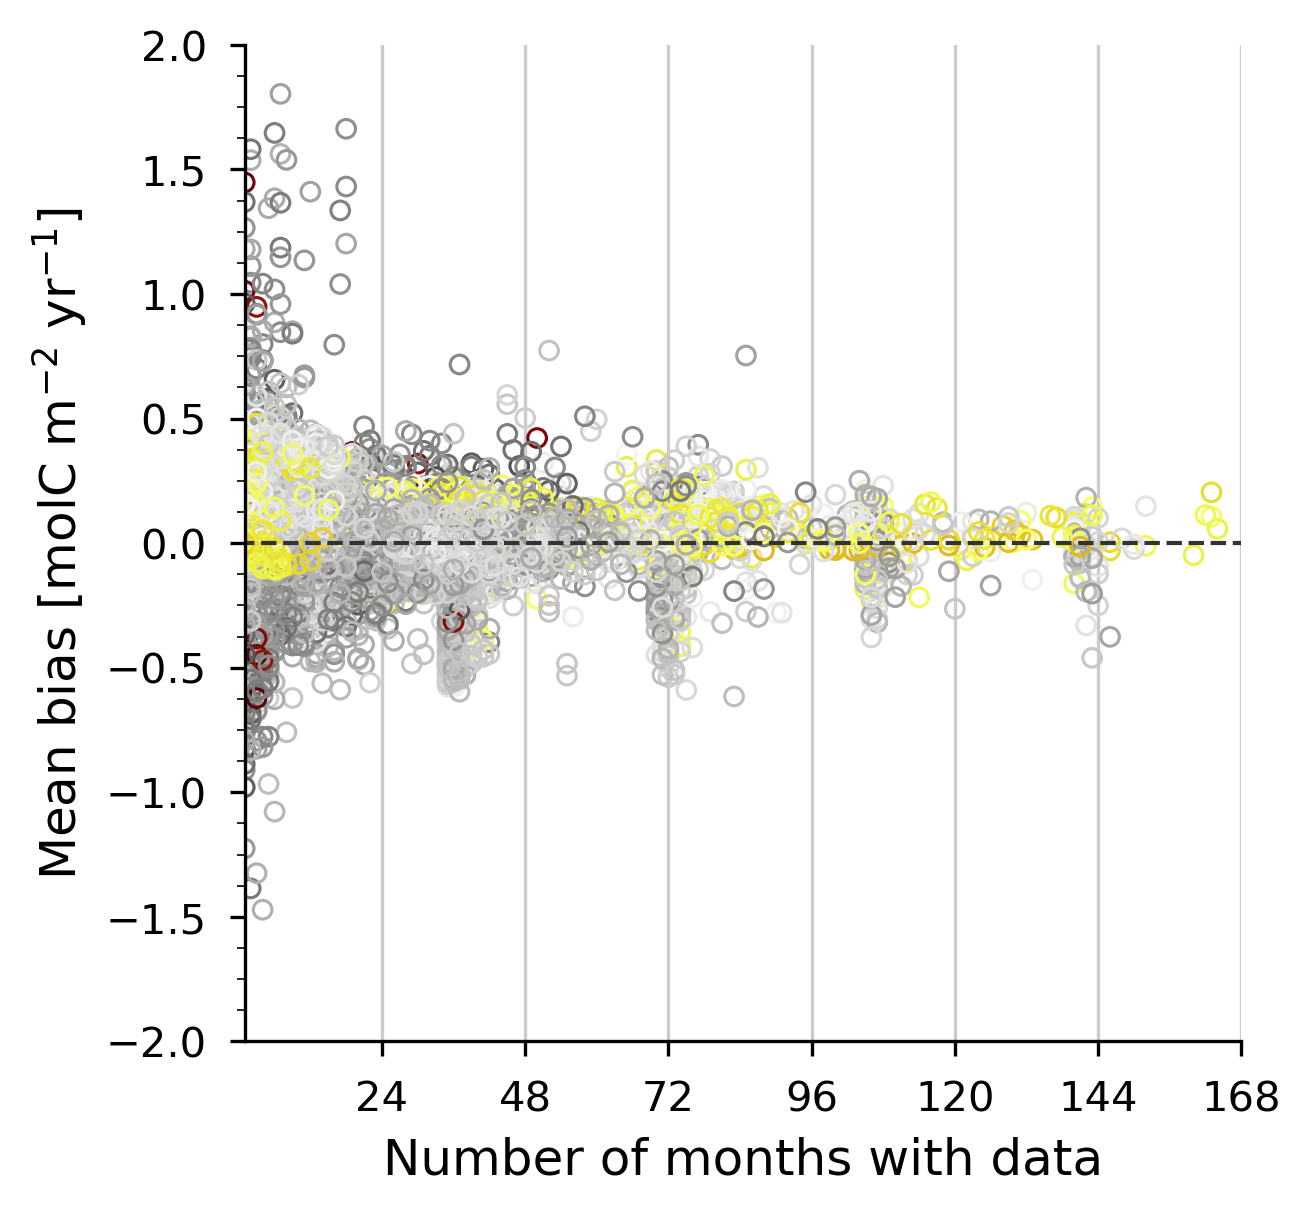

In [11]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    fig = plt.figure(dpi=300) 
    ax = fig.add_subplot(111)
    cmap = plt.cm.nipy_spectral
    cmap = cm.cm.oxy
    
    ## ------------------------------------
    ## Define data variables
    ## -----------------------------------
    corr_dec = ds_stats['corr_dec'].mean(dim='ensemble')
    aae = ds_stats['aae'].mean(dim='ensemble')
    bias = ds_stats['bias'].mean(dim='ensemble')
    lat = ds_stats['lat']

    ## ------------------------------------
    ## 0 reference line
    ## -----------------------------------
    ax.plot([0,168],[0,0],'--',color=[0.2, 0.2, 0.2], linewidth=1)
    
    sub = ax.scatter(nmonths, bias, s=20,
                     c=corr_dec, cmap=cmap, vmin=0, vmax=1, 
                     linewidth=0.75, marker='o') 
    sub.set_facecolor("none")

    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(1,168)
    ax.set_xticks(np.arange(24, 170,24))
    ax.set_ylim(-2,2)
    # fongsize was 20
    ax.set_xlabel('Number of months with data', fontsize=12)
    ax.set_ylabel('Mean bias [molC m$^{-2}$ yr$^{-1}$]', fontsize=12)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)

    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# bias

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


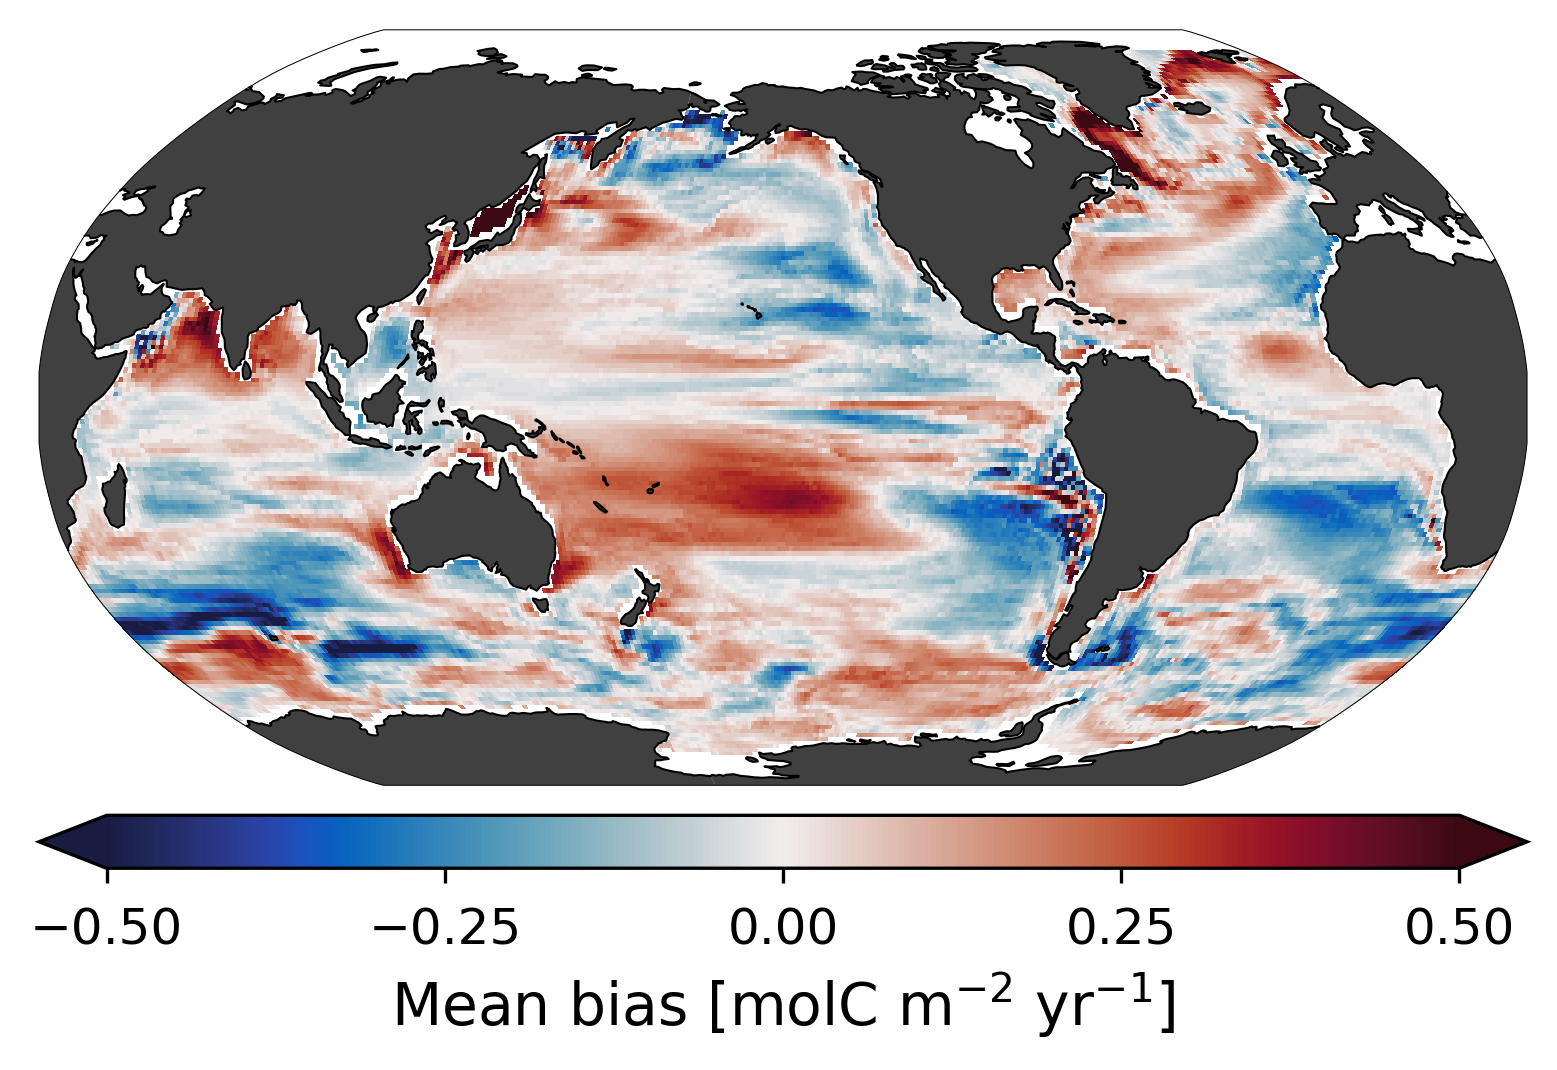

In [12]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    
    # Colorbar ranges
    vrange = [-0.5, 0.5, 0.25]
    cmap = cm.cm.balance
    
    ##-----------------------------------------------------
    ## Ensemble mean
    ##-----------------------------------------------------
    # Bias
    data = (ds_stats['bias']*1).mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon') 
    sub = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                      vrange=vrange[0:2], cmap=cm.cm.balance, ax=0, linewidth_coast=0.5)
    
    #worldmap.set_title(f'SOMFFN/{model}', ax=0)
    # add colorbar
    col = worldmap.add_colorbar(sub, ax=0,extend='both')
    worldmap.set_cbar_xlabel(col, 'Mean bias [molC m$^{-2}$ yr$^{-1}$]', fontsize=14)
    worldmap.set_ticks(col, vrange[0], vrange[1], vrange[2])
    #col.ax.set_xticklabels([vrange[0], vrange[1], vrange[2]])
    col.ax.tick_params(labelsize=12)
#fig.savefig(f'{dir_figs}/bias_map.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# Others

In [ ]:
# Create file list
#/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/pCO2-float_stats
#dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
#files = []
#for key in float_files.keys():
#    files.extend([f'{dir_clean}/pCO2-float_decomp_stl/spco2_decomp_{key}{value}_SOMFFN-float.nc' 
#                  for value in float_files[key]])

In [ ]:
# Create file list
#dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
#/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/pCO2_stats

#files = []
#for key in float_files.keys():
#    files.extend([f'{dir_clean}/pCO2_decomp_stl/pco2_decomp_{key}{value}_SOMFFN.nc' for value in float_files[key]])